In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
# separating dependent and independent variable
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [4]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [5]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test= tts(scaled_x,Y,train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')
classifier = DTC()

In [34]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [35]:
predicted_values[:30]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [10]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3559
           1       0.43      0.45      0.44       855

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414



# Visualising the Decision Tree

In [18]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
               max_depth = None, feature_names = X.columns,
               label = None, impurity = False)

In [19]:
graph = graphviz.Source(dot_data, format = 'png', engine = 'neato')

Visualisation of this decision tree tells us that how decision tree learns each and everything from the dataset and hence leads to an overfitting model.

# Hyperparameter Tuning

In [36]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

# max depth parameter

In [37]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    '''x1, y1: training set
    x2,y2: test set'''
    
    model.fit(x1,y1)
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1, f2

In [38]:
def effect(train_score, test_score, x_axis, title):
    '''train_score: The list of scores when predictions are made on the training set
    test_score: The list of scores when predictions are made on test set
    x_axis: The list of parameter values which were used to generate the respective f1 scores which are on the x axis
    title: title of the plot'''
    plt. figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1_score')
    plt.show()

In [41]:
maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:
    model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

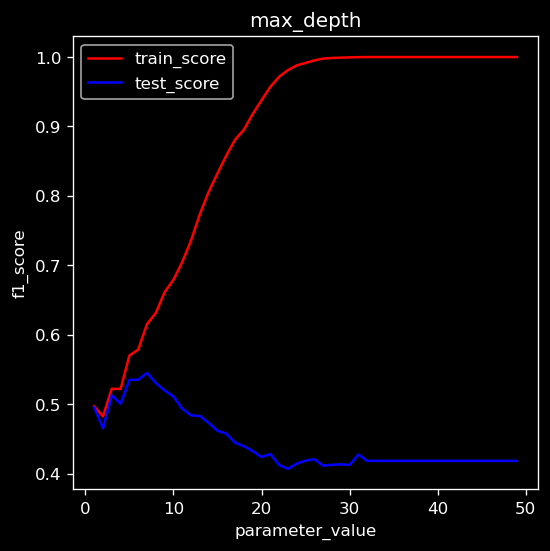

In [43]:
effect(train, test, range(1,50), 'max_depth')

# min_samples_split

In [45]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:
        model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
        f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
        train.append(f1)
        test.append(f2)

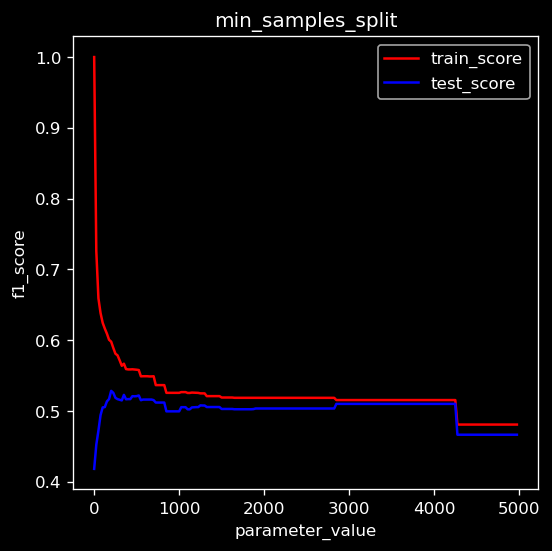

In [46]:
effect(train, test, range(2,5000, 25), 'min_samples_split')

# max_leaf_nodes

In [48]:
max_leaf_nodes = [i for i in range(2,200 , 10)]
train = []
test = []

for i in max_leaf_nodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

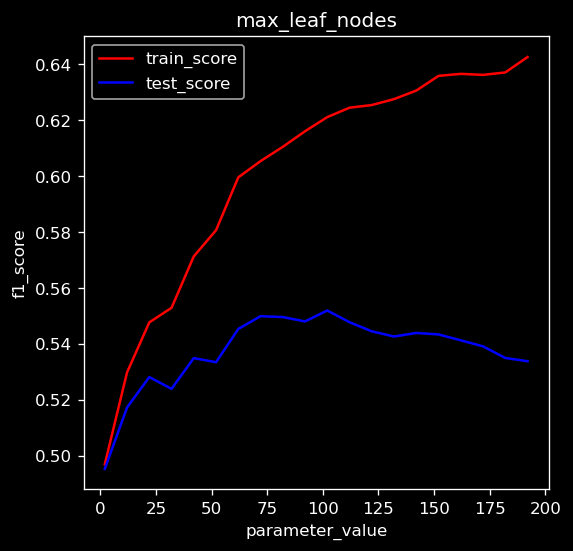

In [49]:
effect(train, test, range(2,200, 10), 'max_leaf_nodes')

# min_samples_leaf

In [53]:
minsampleleaf = [i for i in range(2,4000, 25)]
train = []
test = []

for i in minsampleleaf:
    model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

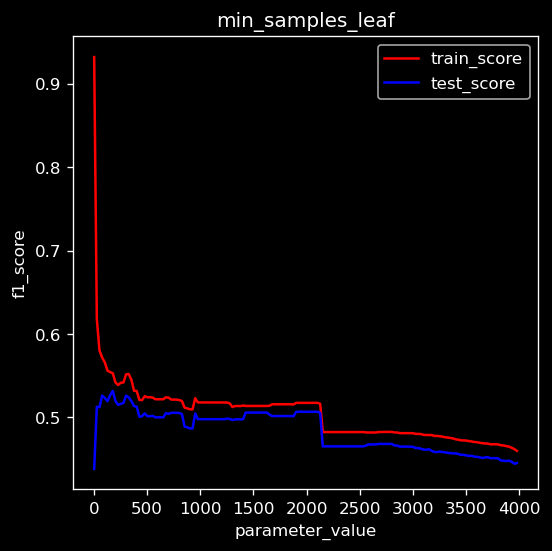

In [54]:
effect(train, test, range(2,4000,25), 'min_samples_leaf')

In [57]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'Feature Importance')

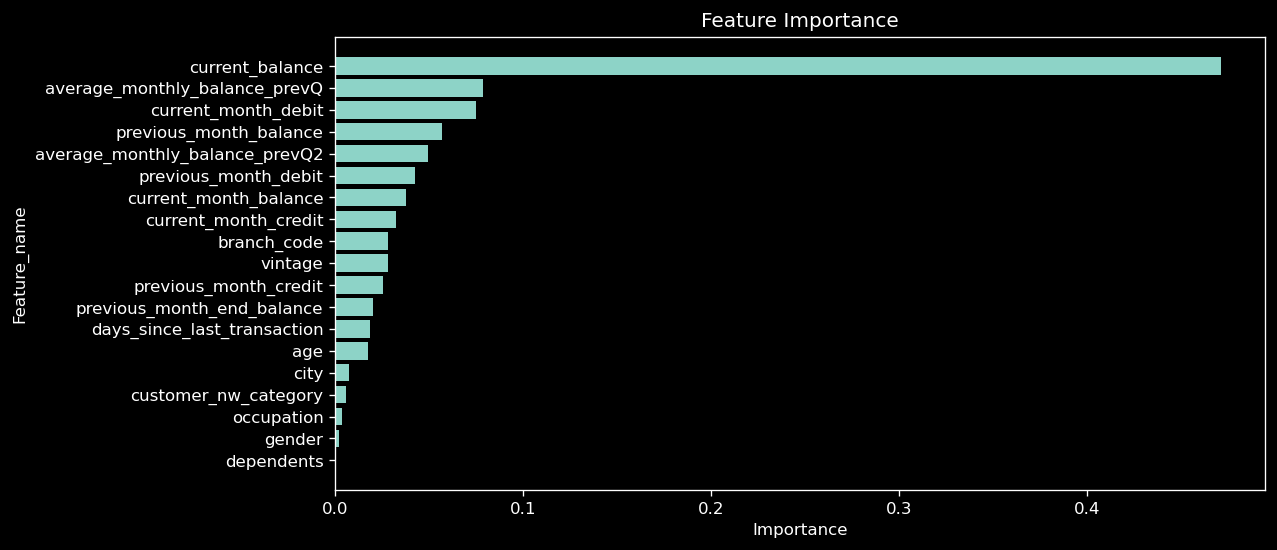

In [58]:
plt.figure(figsize = (10,5), dpi = 120)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('Feature_name')
plt.title('Feature Importance')